# Import Libraries

In [50]:
import numpy as np
import pandas as pd

# Load the Data

In [51]:
data = pd.read_csv('HeightVsWeight.csv')

In [52]:
data

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139
...,...,...
66,76,204
67,77,205
68,78,206
69,79,207


# Finding if there is any missing data

In [97]:
data.isnull().sum()

Age       0
Height    0
dtype: int64

In [102]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,71.0,45.000000,20.639767,10.0,27.5,45.0,62.5,80.0
Height,71.0,160.873239,20.842902,138.0,143.5,155.0,171.5,208.0


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data Visualization

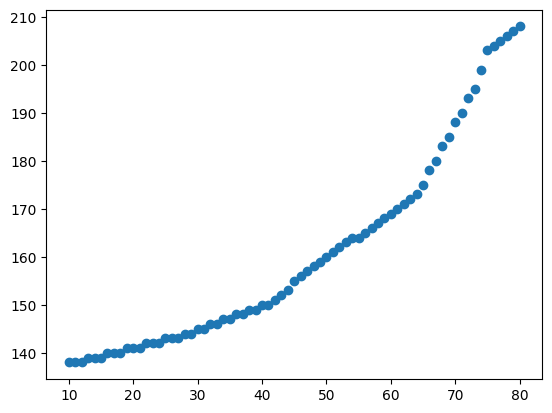

In [54]:
plt.scatter(data['Age'],data['Height'])

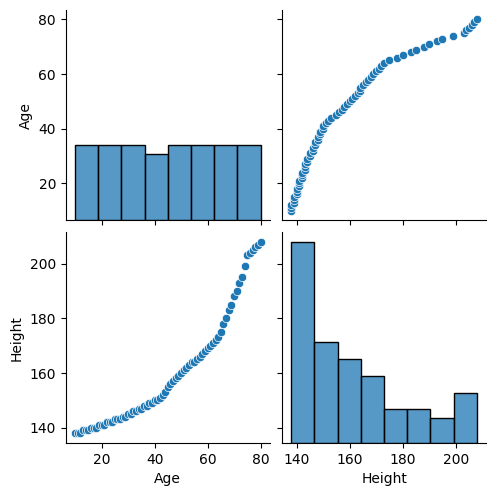

In [104]:
sns.pairplot(data)

<Axes: >

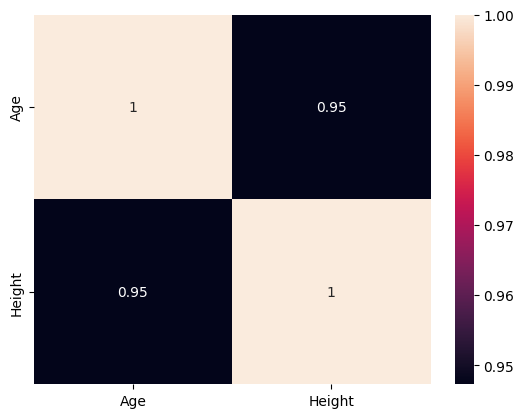

In [124]:
sns.heatmap(data.corr(), annot=True)

In [126]:
X = data.iloc[:,:-1]
y = data['Height']

In [128]:
from sklearn.linear_model import LinearRegression

In [130]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [132]:
y_pred = model.predict(X)

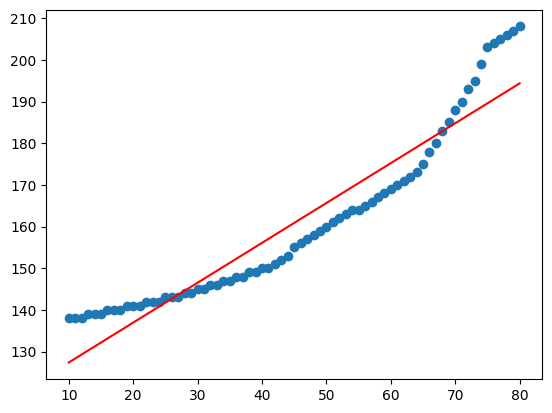

In [134]:
plt.scatter(X,y)
plt.plot(X, y_pred, color='red')

In [136]:
import statsmodels.api as sm
X_stats = sm.add_constant(X)

In [138]:
model  = sm.OLS(y,X_stats).fit()

In [142]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     603.2
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           7.88e-36
Time:                        19:17:19   Log-Likelihood:                -235.06
No. Observations:                  71   AIC:                             474.1
Df Residuals:                      69   BIC:                             478.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        117.8260      1.926     61.176      0.000     113.984     121.668
Age            0.9566      0.039     24.559      0.000       0.879       1.034
==============================================================================
Omnibus:                        9.822   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                8.140
Skew:                           0.729   Prob(JB):                       0.0171
Kurtosis:                       2.208   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Training the Polynomial Regression model on the whole dataset

The trick is to first transform independent variable into polynomial features and later training a Linear Regression model on the transformed X


In [145]:
from sklearn.preprocessing import PolynomialFeatures

In [153]:
poly  = PolynomialFeatures(degree=3)

In [155]:
X_poly = poly.fit_transform(X)
model_poly = LinearRegression()
model_poly.fit(X_poly, y)
y_pred = model_poly.predict(X_poly)

In [157]:
X_poly

array([[1.00000e+00, 1.00000e+01, 1.00000e+02, 1.00000e+03],
       [1.00000e+00, 1.10000e+01, 1.21000e+02, 1.33100e+03],
       [1.00000e+00, 1.20000e+01, 1.44000e+02, 1.72800e+03],
       [1.00000e+00, 1.30000e+01, 1.69000e+02, 2.19700e+03],
       [1.00000e+00, 1.40000e+01, 1.96000e+02, 2.74400e+03],
       [1.00000e+00, 1.50000e+01, 2.25000e+02, 3.37500e+03],
       [1.00000e+00, 1.60000e+01, 2.56000e+02, 4.09600e+03],
       [1.00000e+00, 1.70000e+01, 2.89000e+02, 4.91300e+03],
       [1.00000e+00, 1.80000e+01, 3.24000e+02, 5.83200e+03],
       [1.00000e+00, 1.90000e+01, 3.61000e+02, 6.85900e+03],
       [1.00000e+00, 2.00000e+01, 4.00000e+02, 8.00000e+03],
       [1.00000e+00, 2.10000e+01, 4.41000e+02, 9.26100e+03],
       [1.00000e+00, 2.20000e+01, 4.84000e+02, 1.06480e+04],
       [1.00000e+00, 2.30000e+01, 5.29000e+02, 1.21670e+04],
       [1.00000e+00, 2.40000e+01, 5.76000e+02, 1.38240e+04],
       [1.00000e+00, 2.50000e+01, 6.25000e+02, 1.56250e+04],
       [1.00000e+00, 2.6

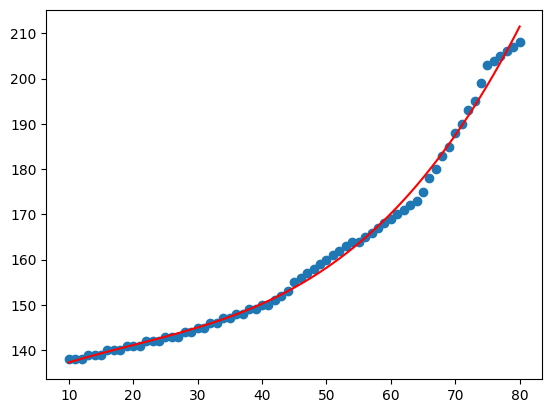

In [159]:
plt.scatter(X,y)
plt.plot(X, y_pred, color='red')

In [161]:
# Predicting the results
y_pred = model_poly.predict(X_poly)


In [163]:
from sklearn.metrics import r2_score

In [165]:
r2_score(y, y_pred) # R2 Score

0.995600902516618